In [132]:
import matplotlib.pyplot as plt
import numpy as np
import json

from pathlib import Path

figpath = Path("/Users/yangjunjie/Downloads")

import matplotlib
import matplotlib.pyplot as plt
# use latex globally
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'

data = None
with open('../data/nio-afm.json', 'r') as f:
    data = json.load(f)

# data_old = None
# with open('../data/diamond-old.json', 'r') as f:
#     data_old = json.load(f)

# # combine data from old and new
# data = {**data_old, **data}

basis = []
nkpt = []
kecut = []
method = []
for d in data:
    # print(d, data[d])
    basis.append(data[d].get('basis', ''))
    nkpt.append(int(data[d].get('nkpt', 0)))
    ke_cutoff = data[d].get('ke_cutoff', 0)
    if ke_cutoff != 'None':
        kecut.append(float(ke_cutoff))
    method.append(data[d].get('method', ''))
# for d in data_old:
#     basis.append(data_old[d].get('basis', ''))
#     nkpt.append(int(data_old[d].get('nkpt', 0)))
#     ke_cutoff = data_old[d].get('ke_cutoff', 0)
#     if ke_cutoff != 'None':
#         kecut.append(float(ke_cutoff))
#     method.append(data_old[d].get('method', ''))
basis = list(set(basis))
nkpt = list(set(nkpt))
kecut = list(set(kecut))
method = list(set(method))

# print(basis)

nkpt.sort()
kecut.sort()
print(method)

color = {'FFTISDF': 'b', 'GDF': 'r', 'FFTDF': 'g'}

print(basis)

['fftisdf-40', 'fftisdf-10', 'fftdf', 'fftisdf-20', 'gdf']
['gth-dzvp-molopt-sr']


In [133]:

def plot_time(method, nkpt, basis, kecut):
    fig, axs = plt.subplots(3, 1, figsize=(6, 5), sharex=True, sharey=True)
    # for ikey, key in enumerate(['time_build_df', 'time_get_vk', 'time_get_eri']):
    y_label = ['Build Time (s)', 'Exchange Time (s)', 'ERI Time (s)']
    for ikey, key in enumerate(['time_build_df', 'time_get_vk', 'time_get_eri']):
        ax = axs[ikey]
        for m in method:
            x = []
            y = []
            for n in nkpt:
                for p, d in data.items():
                    is_in_list = False
                    d_b = d.get('basis', '')
                    d_k = d.get('ke_cutoff', 0.0)
                    d_k = float(d_k) if d_k != 'None' else 0.0
                    d_n = int(d.get('nkpt', 0))
                    d_m = d.get('method', '')

                    is_in_list = (d_b == basis)
                    if m != 'gdf':
                        is_in_list = is_in_list and (d_k == kecut)
                    is_in_list = is_in_list and (d_n == n)
                    is_in_list = is_in_list and (d_m == m)
                    t = d.get(key, np.nan)
                    if is_in_list:
                        x.append(n)
                        y.append(max(t, 0.01))

            label = m.split('-')[0].upper()
            x = np.log2(x)
            y = np.array(y)
            if "fftisdf" in m and 'Exchange' not in y_label[ikey]:
                y = y / 8
            ax.semilogy(x, y, c=color[label], label=label, marker='>', base=2, linestyle='--')
            ax.set_xlim(x.min(), x.max())
            ax.set_ylabel(y_label[ikey])
            ax.grid(
                which='major',
                axis='both',
                linestyle='--',
                linewidth=0.5,
                color='gray'
            )
            ax.set_yticks([2**-2, 2 ** 2, 2 ** 6, 2 ** 10, 2 ** 14])
            ax.set_yticklabels([r'$2^{-2}$', r'$2^2$', r'$2^6$', r'$2^{10}$', r'$2^{14}$'])
            ax.set_ylim([2**-2, 2**14])

            xx = range(1, 6)
            ax.set_xticks(xx)
            ax.set_xticklabels([r'$%d$' % (2 ** i) for i in xx])
            # ax.set_xlim(xx[0] - 0.5, xx[-1] + 0.5)

    ax = axs[-1]
    ax.set_xlabel(r'$N_{\mathbf{k}}$', fontsize=14)

    xx = range(1, 7)
    ax.set_xticks(xx)
    ax.set_xticklabels([r'$%d$' % (2 ** i) for i in xx])
    axs[0].legend(loc='upper left', bbox_to_anchor=(0, 1.35), ncol=3, fontsize=12, frameon=False)

    fig.tight_layout()
    fig.show()
    return fig, axs


/var/folders/sm/7t_ndz1j5n5dlj8m6tnm2h480000gn/T/ipykernel_99586/2114192698.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


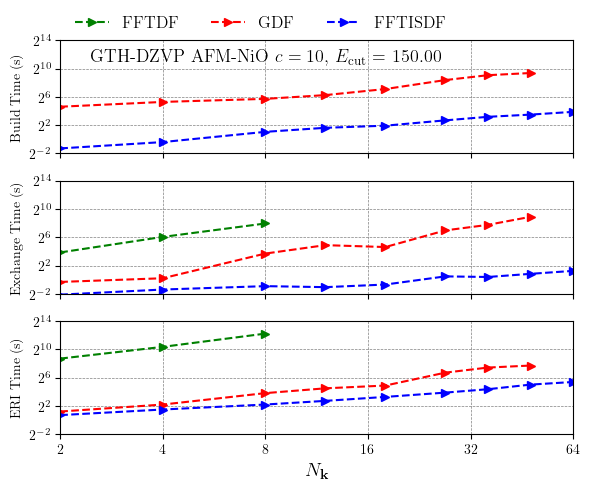

In [134]:
nkpt = nkpt
kecut = 50.0
basis = 'gth-dzvp-molopt-sr'
method = ['fftdf', 'gdf', 'fftisdf-10']
fig, ax = plot_time(method, nkpt, basis, kecut)

ax[0].text(
    0.4, 0.85, r'%s AFM-NiO $c = 10$, $E_{\mathrm{cut}}$ = %6.2f' % (basis[:8].upper(), 150.0), 
    fontsize=13,
    ha='center',
    va='center',  transform=ax[0].transAxes
)

fig.savefig(figpath / 'time-afm-nio-dzvp.png', dpi=300)